In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# 1. Data Augmentation


dataset 이 너무 적은 경우 overfitting 문제가 발생함

![data augmetation](keras_data_augmentation_jitter.png)


keras에서는 dta augmentation을 통해 해결


- Translations
- Rotations
- Changes in scale
- Shearing
- Horizontal (and in some cases, vertical) flips

![image data augmetation](keras_data_augmentation_random_adjustments.jpg)


Type #1: existing dataset을 사용해 학습 dataset를 재구성함
  
<img src=keras_data_augmentation_dataset_generation.png width=300>
  
  

Type #2: In-place/on-the-fly data augmentation - keras에서 구현
   batch 수 만큼 ImageDataGenerator로 실시간 생성 후 원본 제외하고 생성된 데이터 셋으로 학습

<img src=keras_data_augmentation_in_place.png width=300>

잘못된 방식
<img src=keras_data_augmentation_incorrect.png  width=300>

In [10]:
img = tf.keras.preprocessing.image.load_img('C:/test/quokka.jpg')  # 이미지 객체임
data = tf.keras.preprocessing.image.img_to_array(img)   # data 만 추출
sample = expand_dims(data,0)  
print(sample.shape)

(1, 225, 225, 3)


In [21]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('C:/test/quokka.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
print(sample.shape)

(1, 225, 225, 3)


수평, 수직 이동

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2) 
obj = generator.flow(sample, batch_size=1)   

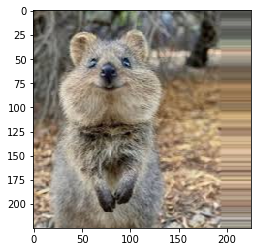

In [111]:
# 할때마다 다른 이미지 나온다.
image = obj.next()
plt.imshow(image[0])

(1, 225, 225, 3)
(225, 225, 3)


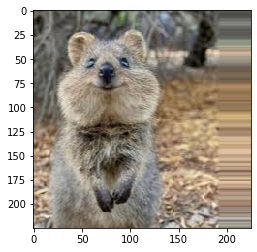

In [24]:
print(image.shape)  # 
print(image[0].shape)
#plt.imshow(image[0].astype('uint8') )  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 
plt.imshow(image[0]/255)  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)   # rescale 해주면 정규화하고, imshow할때 type변한 필유없다.
obj = generator.flow(sample, batch_size=1)   

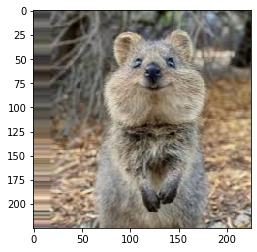

In [116]:
image = obj.next()
plt.imshow(image[0])

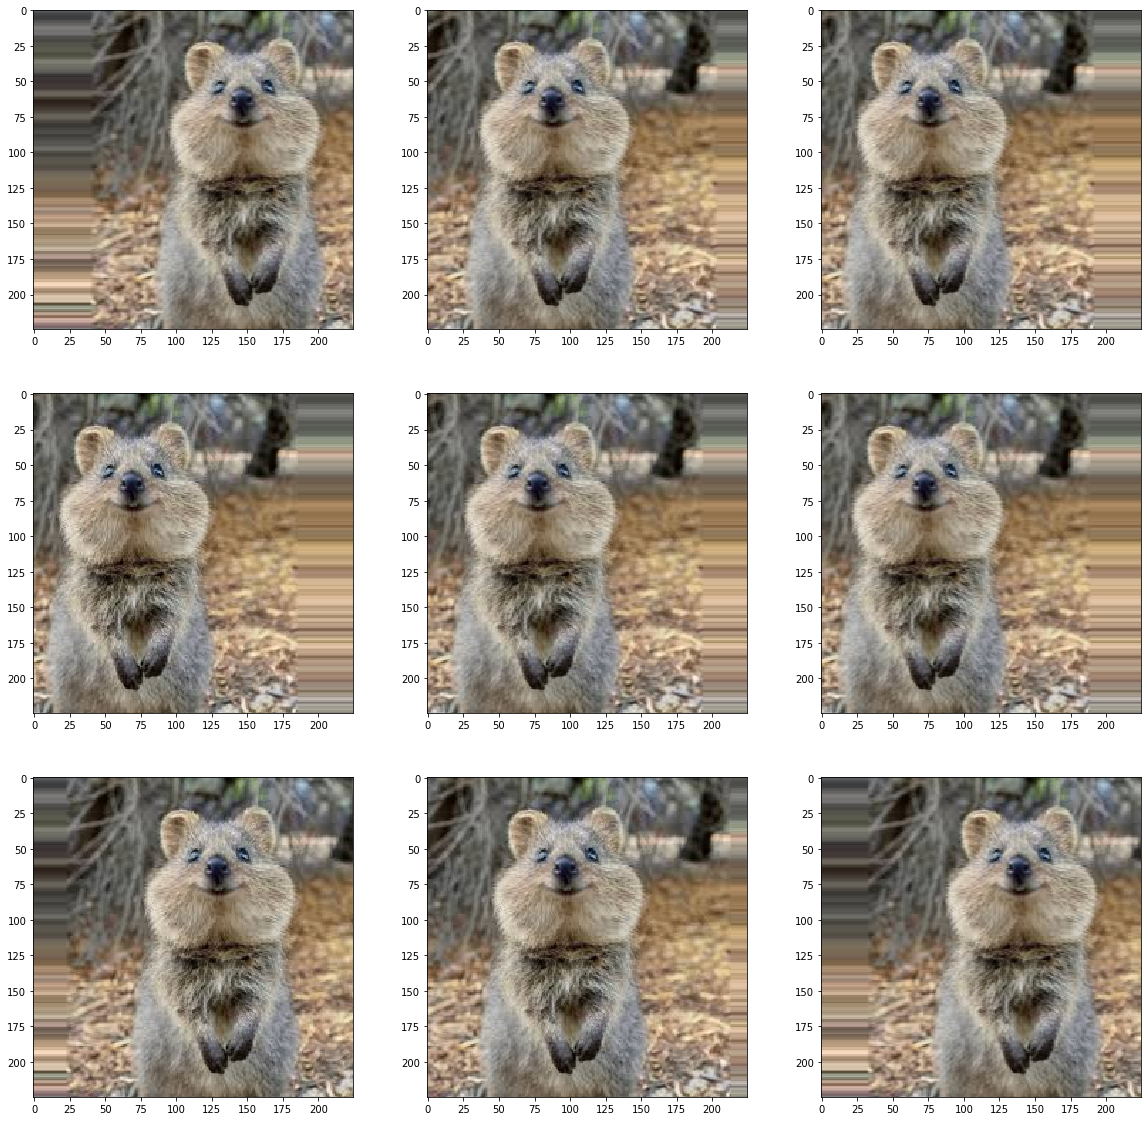

In [114]:
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

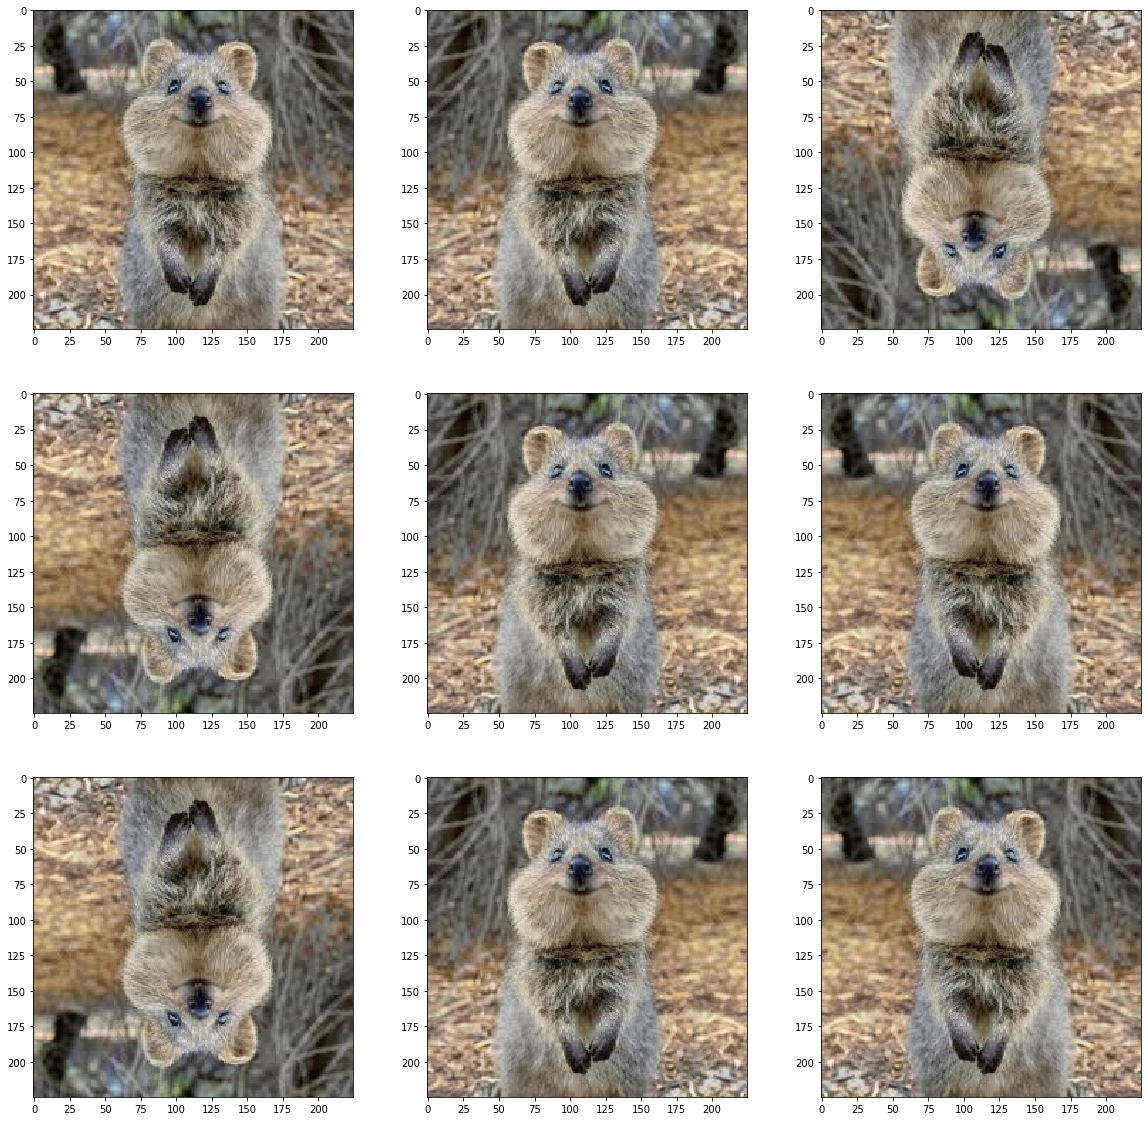

In [118]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

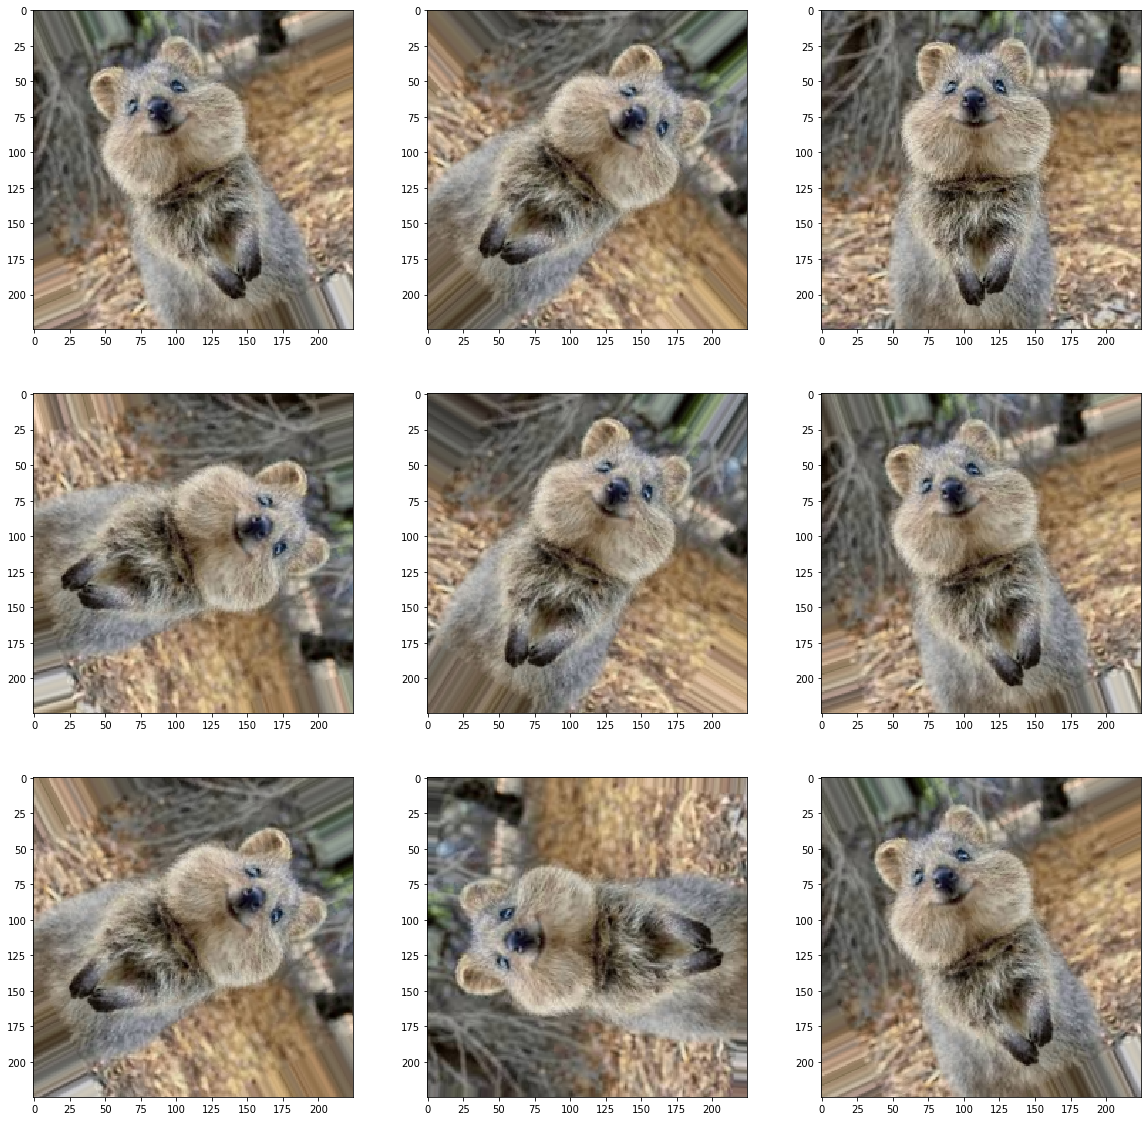

In [119]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   
    

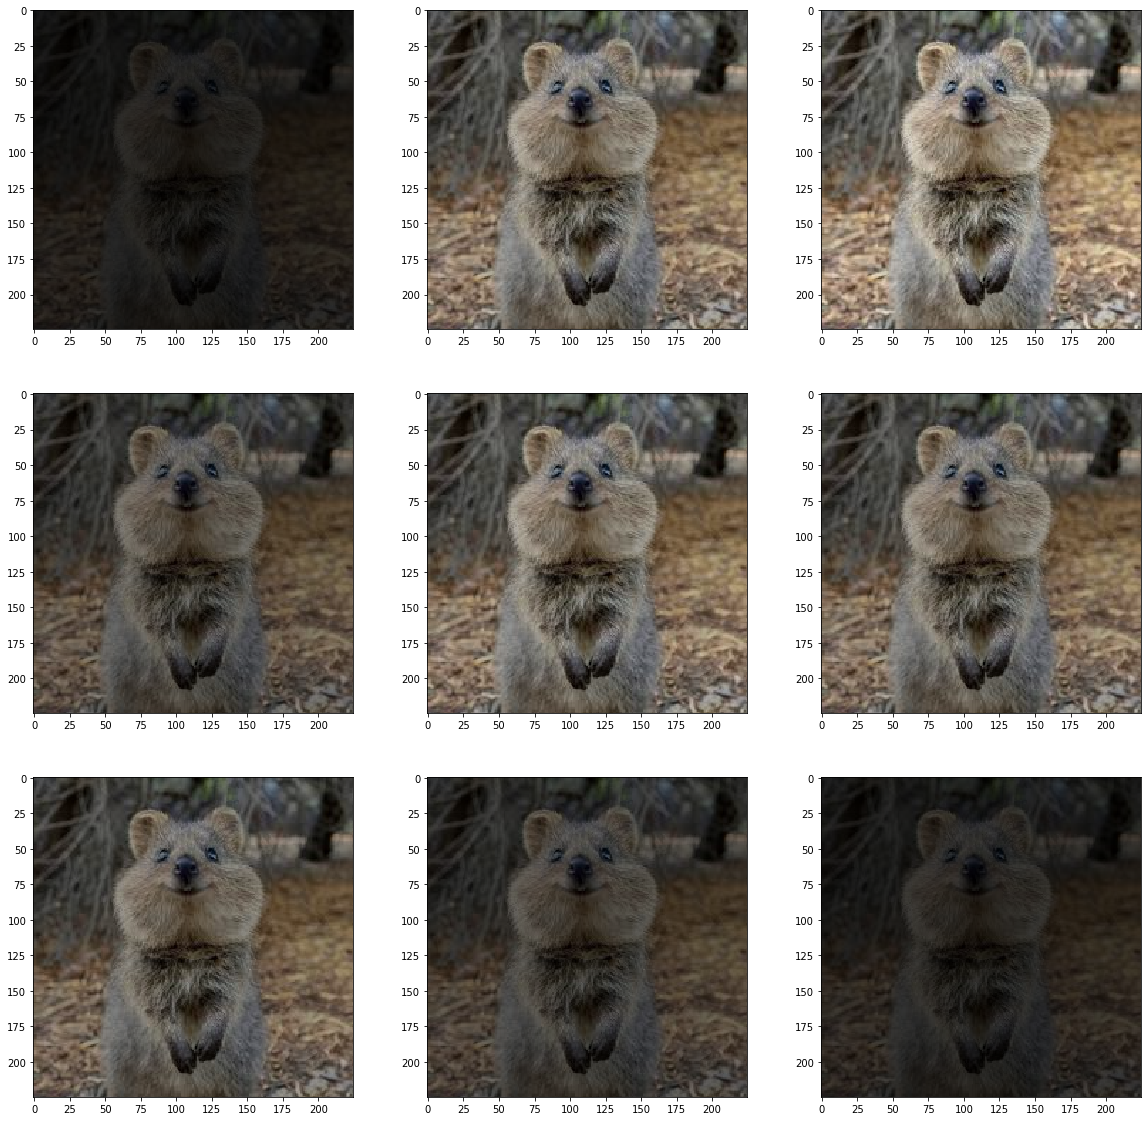

In [121]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

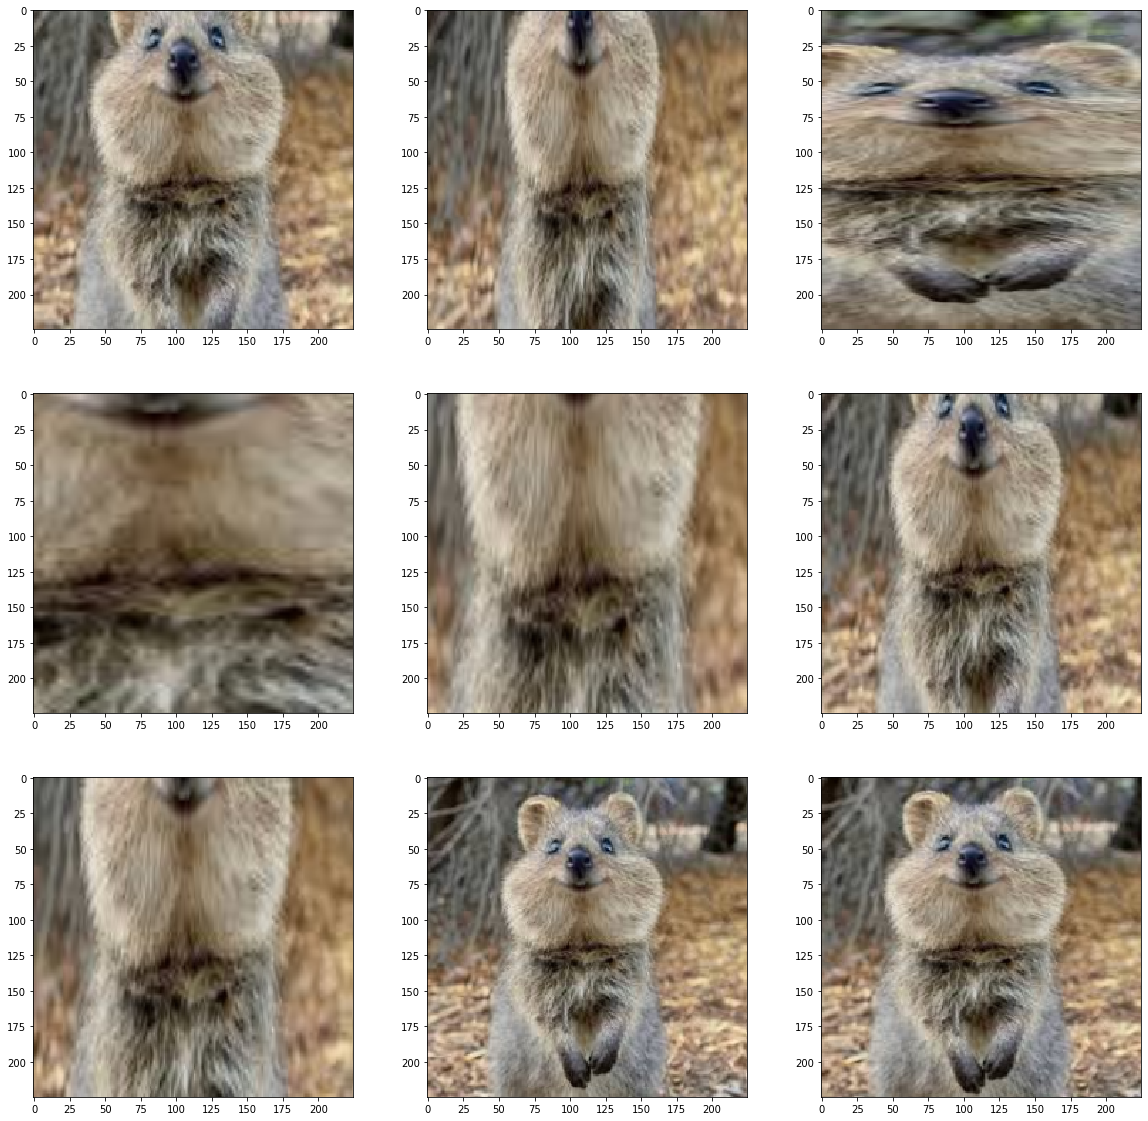

In [125]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

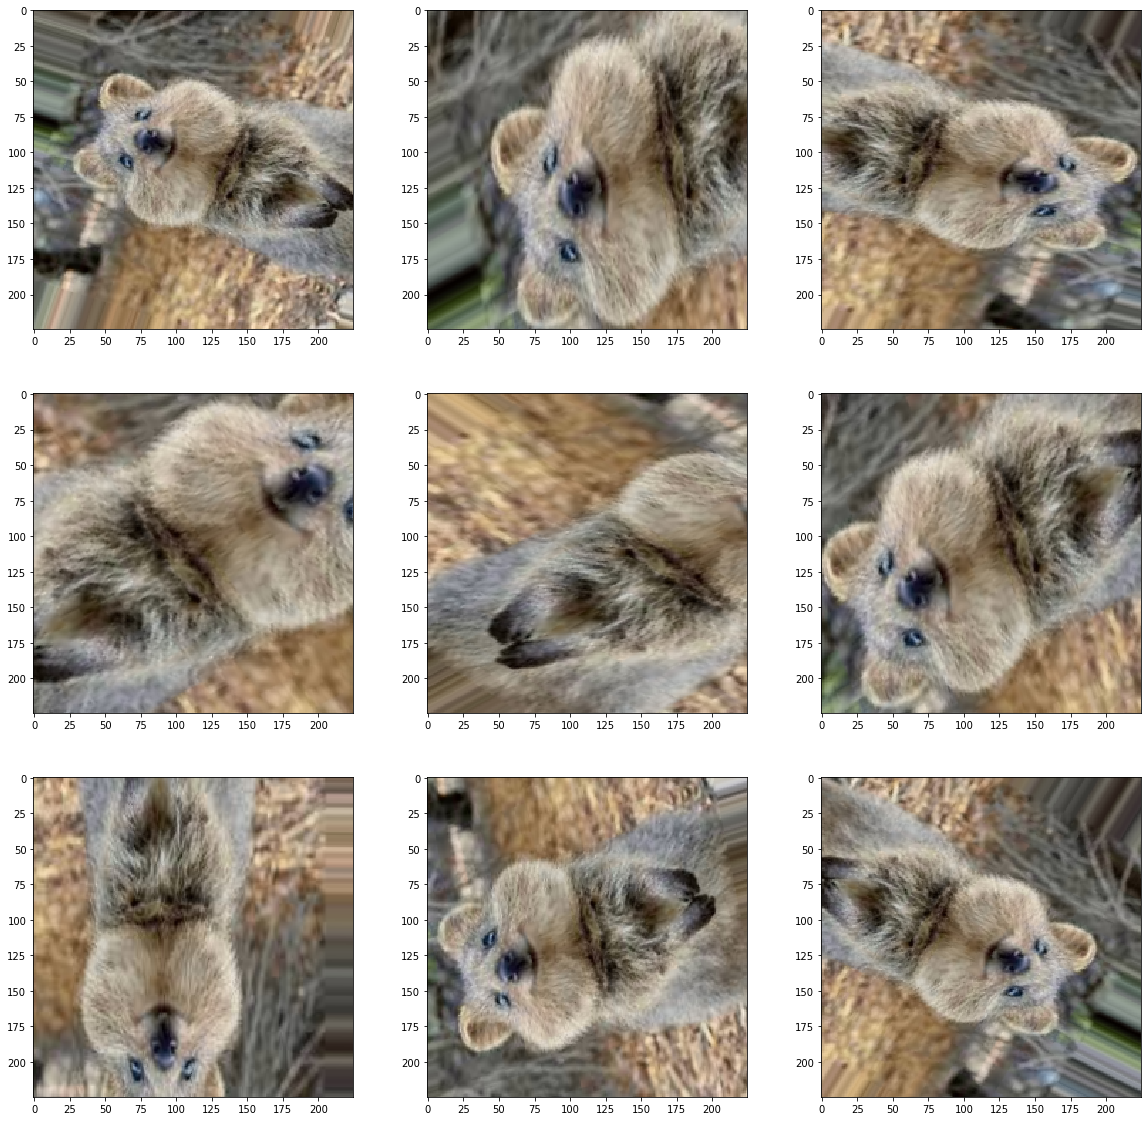

In [128]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)

#batch_size는 data 중에서 몇개를 사용할지 정하는 것
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

In [129]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp',  # 폴더는 생성되어 있어야 함
    save_prefix="image", save_format="jpg")    

for i in range(0, 5):
    obj.next()    

In [141]:
# 2.  디렉토리로 부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지    

obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 10,   # data이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'categorical' )  # # binary(label)  |  categorical(one-hot)

Found 75 images belonging to 3 classes.


In [142]:
iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(10, 150, 150, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
(10, 150, 150, 3)


In [161]:
# 저장하기
obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# aug 폴더하나에 8개이미지 출력됙다.  class별로 저정할수 없나?( 좀더 찾아바야함)

Found 75 images belonging to 3 classes.
[2. 2. 2. 0.]
(4, 150, 150, 3)
[2. 1. 2. 2.]
(4, 150, 150, 3)


#  2. 도형 

In [257]:
np.random.seed(5)


# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break
        

In [258]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [259]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [260]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=10, #200
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1997 - accuracy: 0.9189 - val_loss: 8.2168e-04 - val_accuracy: 0.8667
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 6.4770e-06 - val_accuracy: 0.7333
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0300 - accuracy: 0.9887 - val_loss: 4.5697e-06 - val_accuracy: 0.8000
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0242 - accuracy: 0.9940 - val_loss: 0.0000e+00 - val_accuracy: 0.8000
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 2.2927e-05 - val_accuracy: 0.8000
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0000e+00 - val_accuracy: 0.8000
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0205 - accuracy: 0.9

In [261]:
# 모델 예측하기
print("-- Predict --")
output = model.predict_generator( test_generator,  steps = 5)    # batch 사이즈가 3 , 15개가 생성됨
print(output)

-- Predict --
[[2.02002391e-01 7.97980249e-01 1.72752170e-05]
 [1.06607319e-03 4.20402847e-02 9.56893623e-01]
 [1.00000000e+00 1.26115529e-09 5.79878368e-08]
 [1.00000000e+00 8.23538127e-09 4.31561925e-10]
 [1.00000000e+00 6.62359945e-10 5.76552175e-08]
 [2.04394834e-12 1.00000000e+00 1.63369440e-09]
 [2.25297893e-17 1.50017207e-02 9.84998286e-01]
 [2.78889072e-08 9.99999881e-01 1.04660081e-07]
 [5.32341817e-22 1.00000000e+00 6.45697768e-16]
 [3.17004073e-04 9.99648929e-01 3.40878723e-05]
 [5.53425795e-13 1.34466077e-07 9.99999881e-01]
 [1.44476363e-13 1.01191225e-13 1.00000000e+00]
 [7.87783987e-12 2.28156568e-06 9.99997735e-01]
 [4.12554715e-14 2.93877553e-12 1.00000000e+00]
 [8.58613114e-19 7.73752231e-15 1.00000000e+00]]


In [262]:
T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[1 2 0 0 0 1 2 1 1 1 2 2 2 2 2]


0.8

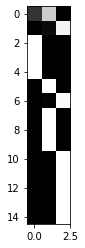

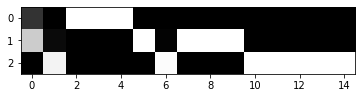

In [263]:
img=output*255

plt.imshow(output,cmap="gray")
plt.show()

plt.imshow(output.T,cmap="gray")
plt.show()



In [264]:
# 모델 평가하기
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

0.800000011920929


In [265]:
labels=['c','r','t']

In [ ]:
idx=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

In [ ]:
plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx) / cc)+1

for k in range( len(idx) ) :        
  i = idx[k]             
  c =  "blue" if  p[i] == T[i]   else "red"
  plt.subplot( rr ,cc*2, k*2+1)    
  plt.imshow(test_generator, extent=[0, 0.8, 0.5, 0.9], aspect='auto', zorder=10, cmap="gray")
  plt.subplot( rr ,cc, k+1)
  plt.bar(labels, output[i], color=c)
  plt.xlabel("true:{}->  predict:{} {:2.0f}%".
             format(labels[int(T[  i ])], labels[p[  i ]],  100*np.max(output[i], axis=0)),  color = c )

In [242]:
test_generator=test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24,24),
        batch_size=15,
        class_mode='binary',
        shuffle=False)

a=test_generator.next()
print(a[0].shape)
print(a[1].shape)

Found 15 images belonging to 3 classes.
(15, 24, 24, 3)
(15,)


# 3. dog cat  augmentatation

- https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/
- https://www.kaggle.com/c/dogs-vs-cats/data
- 학습 데이터로 1,000장의 고양이 사진과 1,000장의 강아지 사진을 사용 (kaggle  25,000자)
- 검증 데이터로는 각각 400장 사용

In [1]:
img = load_img('cat.jpg') 
x = img_to_array(img)
print(x.shape)   # w,h,c 인직 확인

NameError: name 'load_img' is not defined

In [4]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않음(이미지 원본을 사용)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train', 
        target_size=(150, 150), 
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# steps_per_epoch는 한 세대마다 몇 번 생성기로부터 데이터를 얻을지를 나타내는 값
# 한 세대마다 사용되는 학습데이터의 수는 steps_per_epoch * batch_size
        
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    # 2000/16     한번에 125개씩 생성
        epochs=50,  #50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)     # 800/16   한번에 50개씩 생성

model.save("smallcatdog1.h5")


Epoch 1/50
125/125 [==============================] - 13s 107ms/step - loss: 0.1184 - acc: 0.9670 - val_loss: 2.2636 - val_acc: 0.7037
Epoch 2/50
125/125 [==============================] - 13s 105ms/step - loss: 0.1419 - acc: 0.9735 - val_loss: 2.5005 - val_acc: 0.6987
Epoch 3/50
125/125 [==============================] - 13s 105ms/step - loss: 0.1412 - acc: 0.9760 - val_loss: 3.1004 - val_acc: 0.6963
Epoch 4/50
125/125 [==============================] - 13s 106ms/step - loss: 0.0884 - acc: 0.9780 - val_loss: 2.7598 - val_acc: 0.6925
Epoch 5/50
125/125 [==============================] - 13s 104ms/step - loss: 0.1280 - acc: 0.9715 - val_loss: 3.0091 - val_acc: 0.6837
Epoch 6/50
125/125 [==============================] - 13s 104ms/step - loss: 0.1356 - acc: 0.9700 - val_loss: 1.7526 - val_acc: 0.6750
Epoch 7/50
125/125 [==============================] - 13s 106ms/step - loss: 0.1230 - acc: 0.9760 - val_loss: 1.8668 - val_acc: 0.6937
Epoch 8/50
125/125 [==============================] - 1

In [7]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator( test_generator,       steps = 800/16)
print(scores[1])

-- Evaluate --
0.725


In [15]:
# augmentation 없이  학습
batch_size = 20

train_datagen = ImageDataGenerator(rescale=1./255 )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'clean-dataset/train',  # this is the target directory
        target_size=(150, 150),  # 모든 이미지의 크기가 150x150로 조정됩니다.
        batch_size=batch_size,
        class_mode='categorical')  # binary_crossentropy 손실 함수를 사용하므로 binary 형태로 라벨을 불러와야 합니다.

validation_generator = validation_datagen.flow_from_directory(
        'clean-dataset/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'clean-dataset/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50, # 50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save("clean-dataset.h5")
scores = model.evaluate_generator( test_generator,       steps = 800/5)
print(scores[1])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/50
100/100 [==============================] - 15s 154ms/step - loss: 0.8858 - acc: 0.6085 - val_loss: 0.5389 - val_acc: 0.7867
Epoch 2/50
100/100 [==============================] - 14s 137ms/step - loss: 0.4724 - acc: 0.8285 - val_loss: 0.3365 - val_acc: 0.9000
Epoch 3/50
100/100 [==============================] - 14s 136ms/step - loss: 0.3103 - acc: 0.8895 - val_loss: 0.4401 - val_acc: 0.8800
Epoch 4/50
100/100 [==============================] - 14s 140ms/step - loss: 0.1921 - acc: 0.9285 - val_loss: 0.6126 - val_acc: 0.8533
Epoch 5/50
100/100 [==============================] - 14s 138ms/step - loss: 0.1640 - acc: 0.9425 - val_loss: 0.3902 - val_acc: 0.9067
Epoch 6/50
100/100 [==============================] - 14s 137ms/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.8171 - val_acc: 0.7867
Epoch 7/50
100/100 [==============================] - 14s 136ms/ste

In [16]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator( test_generator,       steps = 800/16)
print(scores[1])

-- Evaluate --
0.8712765916864923


In [3]:
from keras.models import load_model

model2=load_model('smallcatdog.h5')

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [4]:
# augmentation 없이  학습
batch_size = 16

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

scores = model2.evaluate_generator( test_generator, steps = 800/16)
print(scores[1])

Found 800 images belonging to 2 classes.
0.68375


# 4. imagenet에서 검색해서 다운하기



In [2]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

In [4]:
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289") #ship synset  wnetid
soup = BeautifulSoup(page.content, 'html.parser')
str_soup=str(soup)
split_urls=str_soup.split('\r\n')
print(len(split_urls))

1262


In [5]:
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')
bikes_str_soup=str(bikes_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')
print(len(bikes_split_urls))

1345


In [25]:
def url_downalod(urls, path, prefix) :    
    idx = 0
    for url in urls :
        try:
            resp = urllib.request.urlopen(url)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            if ( len(image.shape)) == 3 :
                print(url)
                idx += 1
                save_path = path + '/' + prefix + str(idx)+'.jpg'
                cv2.imwrite(save_path,image)
        except :
            None


In [ ]:
url_downalod(split_urls, 'imagenet/aa', 'ship') # aa 폴더에 ship1 부터 저장

In [ ]:
url_downalod(bikes_split_urls, 'imagenet/bikes', 'bike')

In [2]:
train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        'imagenet/train/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'imagenet/validation/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 64 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [3]:
model2 =  Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3))) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model2.fit_generator(
        train_generator,
        steps_per_epoch=100, # 2000
        epochs=2, validation_data=validation_generator   #65
        )

Epoch 1/2
100/100 [==============================] - 19s 187ms/step - loss: 0.8775 - accuracy: 0.9328 - val_loss: 2.6246 - val_accuracy: 0.4714
Epoch 2/2
100/100 [==============================] - 18s 178ms/step - loss: 0.0873 - accuracy: 0.9375 - val_loss: 15.1905 - val_accuracy: 0.4714


In [4]:
img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0


# 5. 네트웍 저장 및 복구

In [5]:
model2.save('bicycleship.h5')

In [2]:
from keras.models import load_model
model2 = load_model('bicycleship.h5')


img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0


In [7]:
model_json = model2.to_json()
with open("bicycleship.json", "w") as json_file : 
    json_file.write(model_json)   
model2.save_weights("bicycleship_w.h5")

In [2]:
from keras.models import model_from_json 

json_file = open("bicycleship.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
model3 = model_from_json(loaded_model_json)
model3.load_weights("bicycleship_w.h5")

img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model3.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0
